### Initialization

In [45]:
%load_ext autoreload
%autoreload 2
import numpy as np, sys, os
in_colab = 'google.colab' in sys.modules
# fetching code and data(if you are using colab
if in_colab:
    !rm -rf s2search
    !git clone --branch pipelining https://github.com/youyinnn/s2search.git
    sys.path.insert(1, './s2search')
    %cd s2search/pipelining/pdp-exp1/

pic_dir = os.path.join('.', 'plot')
if not os.path.exists(pic_dir):
    os.mkdir(pic_dir)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading data

In [46]:
sys.path.insert(1, '../../')
import numpy as np, sys, os, pandas as pd
from s2search_score_pdp import pdp_based_importance

sample_name = 'cslg-rand-100'

f_list = [
    'title', 
    'abstract', 
    'venue', 'authors', 
    'year', 
    'n_citations'
]

pdp_xy = []
pdp_imp_metric = pd.DataFrame(columns=['f1_name', 'f2_name', 'pdp_based_interaction'])

for i in range(len(f_list)):
    f1_name = f_list[i]
    for j in range(i + 1, len(f_list)):
        f2_name = f_list[j]
        file = os.path.join('.', 'scores', f'{sample_name}_pdp2w_{f1_name}_{f2_name}.npz')
        if os.path.exists(file):
            pdp_values = np.load(file)['arr_0']
            
            pdp_xy.append({
                'f1_name': f1_name,
                'f2_name': f2_name,
                'z': pdp_values,
                'title': f'2-way PDP for {f1_name}:{f2_name}'
            })
            
            std_f1_imp_on_f2 = np.std([pdp_based_importance(row, f1_name) for row in pdp_values], ddof=1)
            std_f2_imp_on_f1 = np.std([pdp_based_importance(row, f2_name) for row in np.flipud(np.rot90(pdp_values))], ddof=1)

            pdp_imp_metric.loc[len(pdp_imp_metric.index)] = [f1_name, f2_name, round(np.mean([std_f1_imp_on_f2, std_f2_imp_on_f1]), 10)]
            
                    
print(pdp_imp_metric.sort_values(by=['pdp_based_interaction'], ascending=False))


     f1_name      f2_name  pdp_based_interaction
0      title     abstract               1.937379
5   abstract        venue               0.603521
1      title        venue               0.309480
14      year  n_citations               0.056796
3      title         year               0.048401
10     venue         year               0.038115
7   abstract         year               0.029938
4      title  n_citations               0.014476
8   abstract  n_citations               0.007853
11     venue  n_citations               0.004152
2      title      authors               0.000000
6   abstract      authors               0.000000
9      venue      authors               0.000000
12   authors         year               0.000000
13   authors  n_citations               0.000000


### PDP

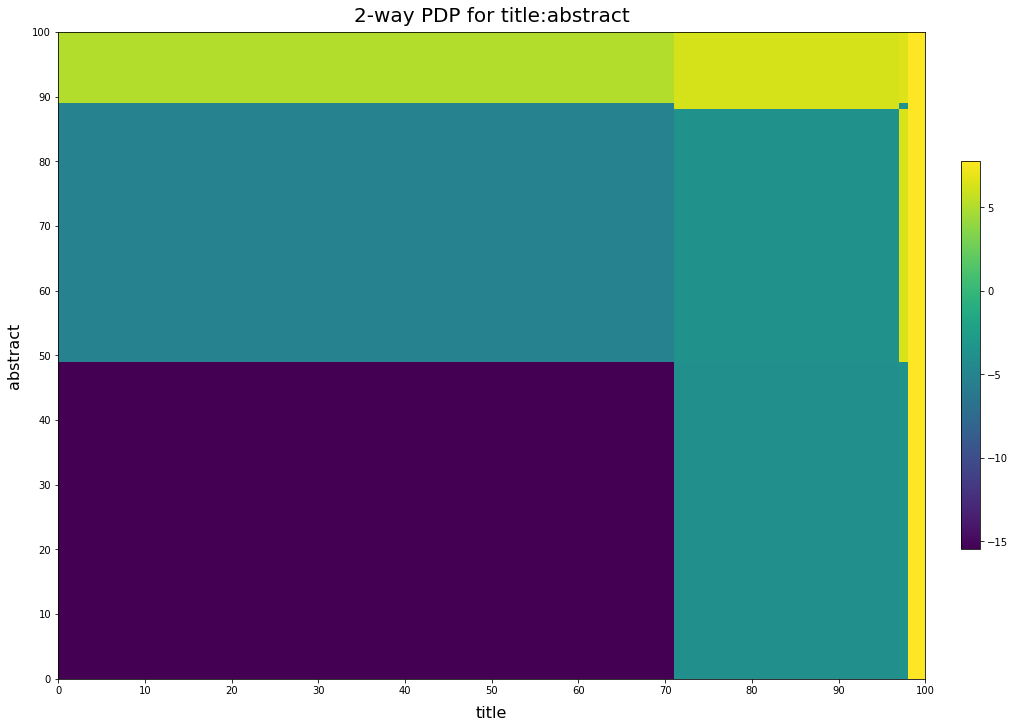

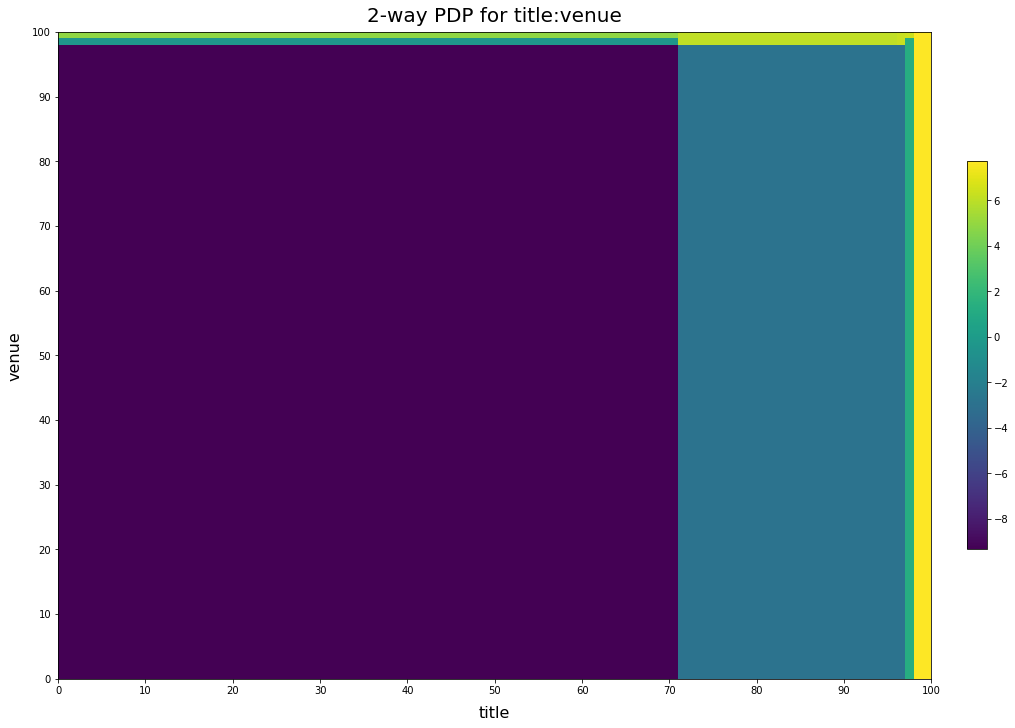

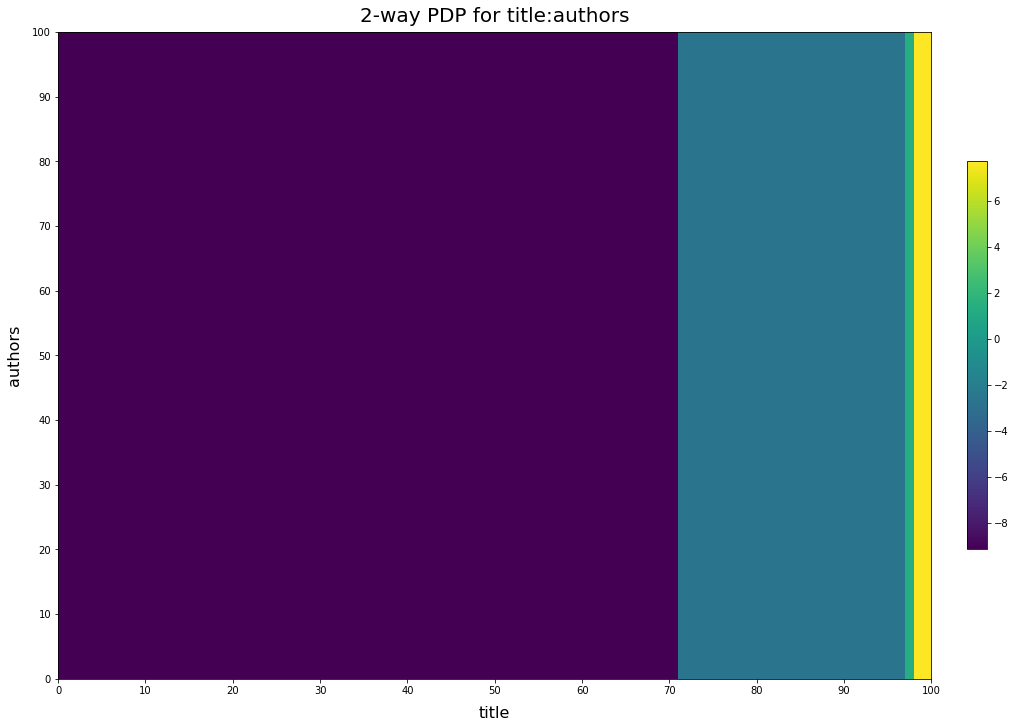

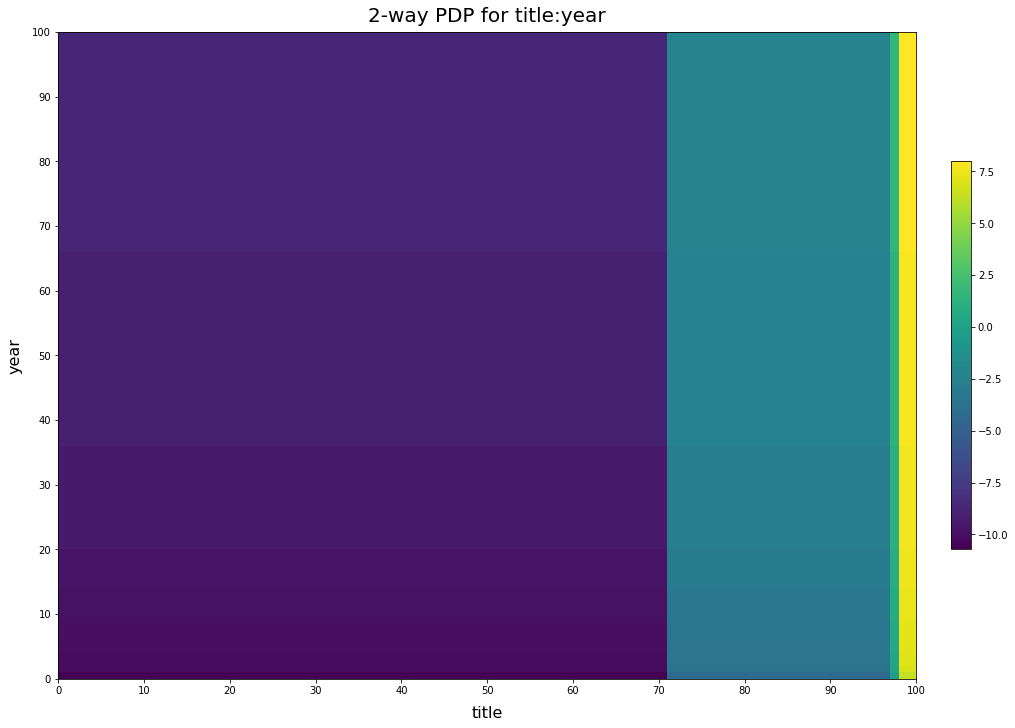

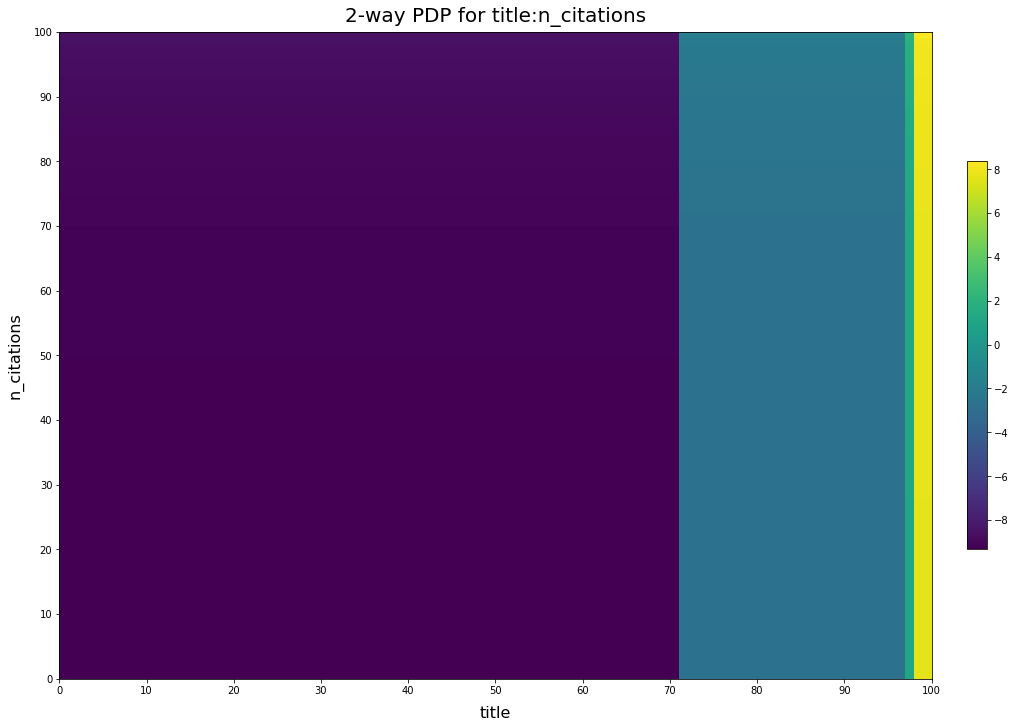

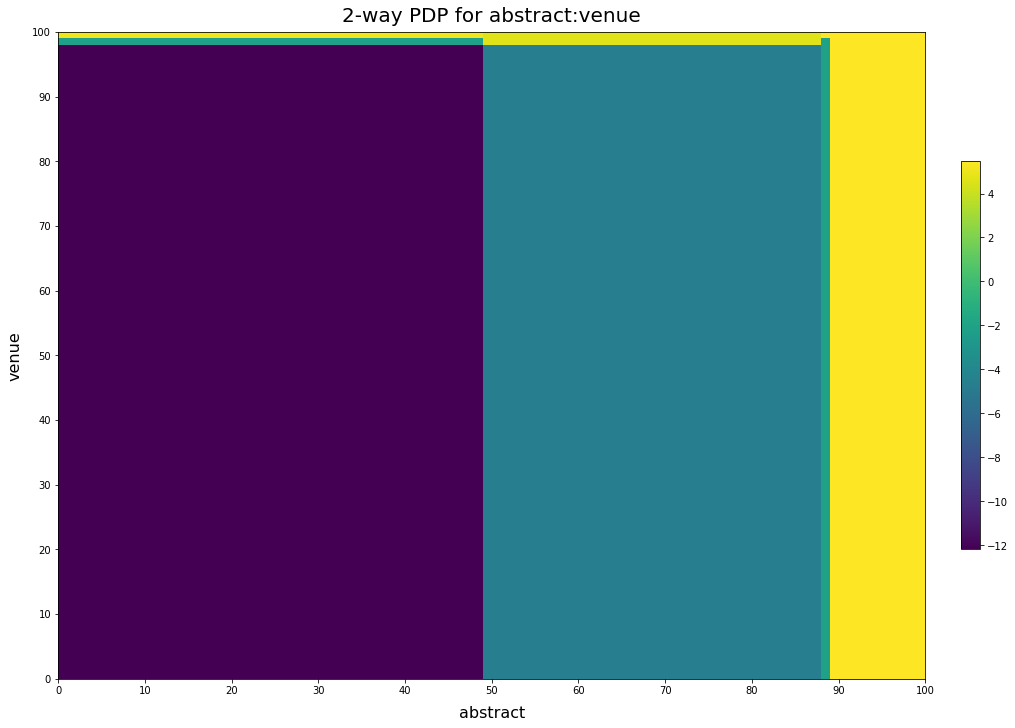

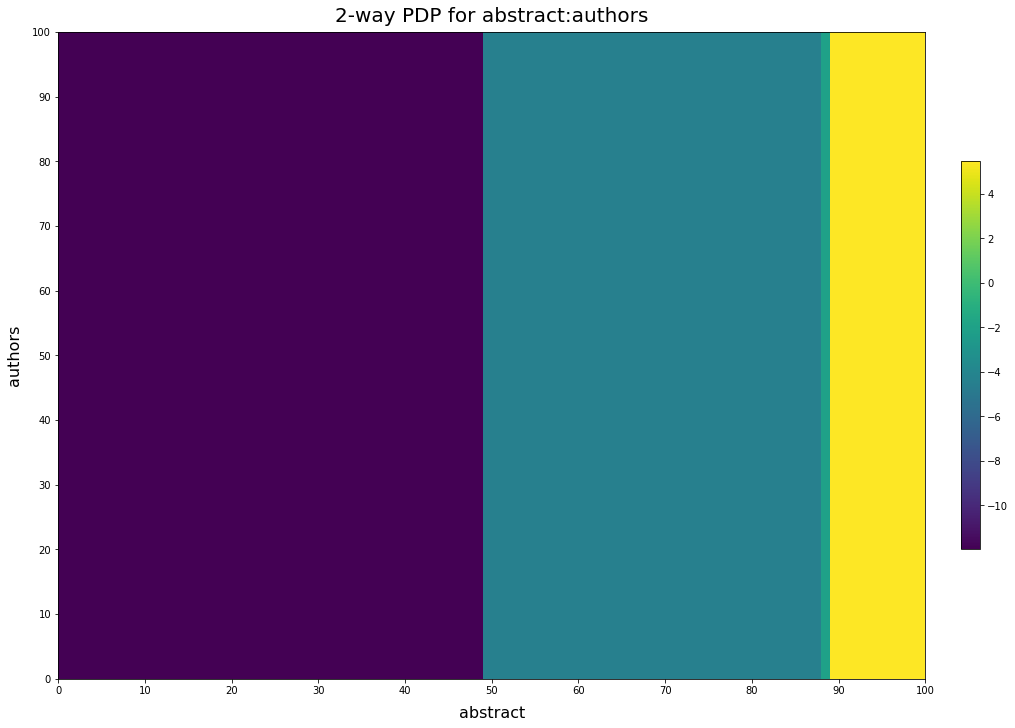

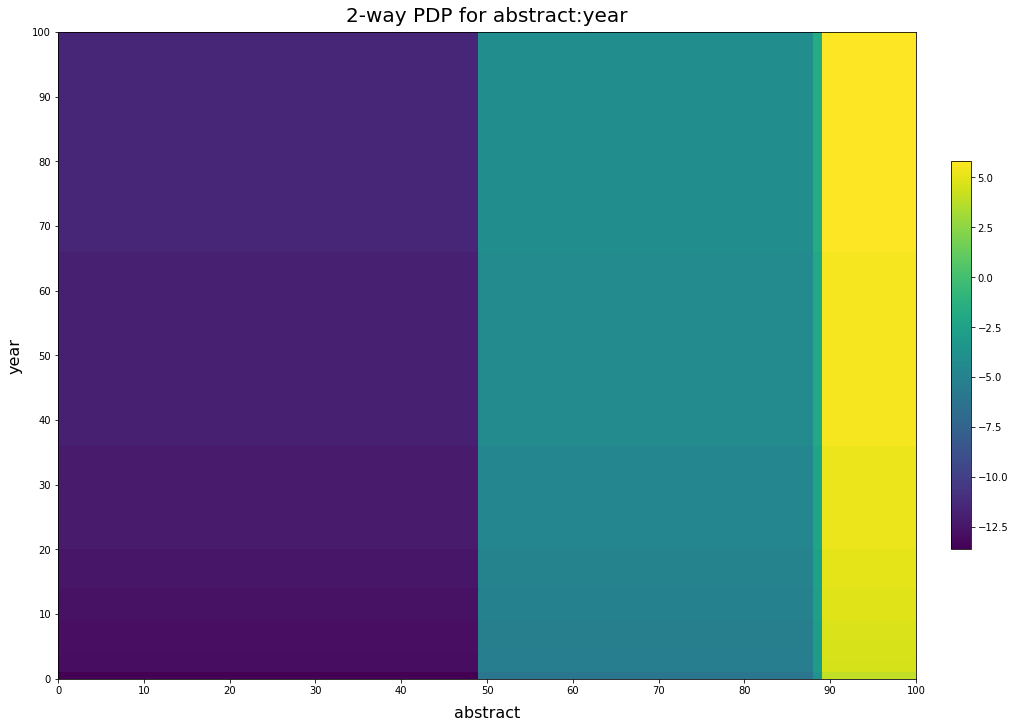

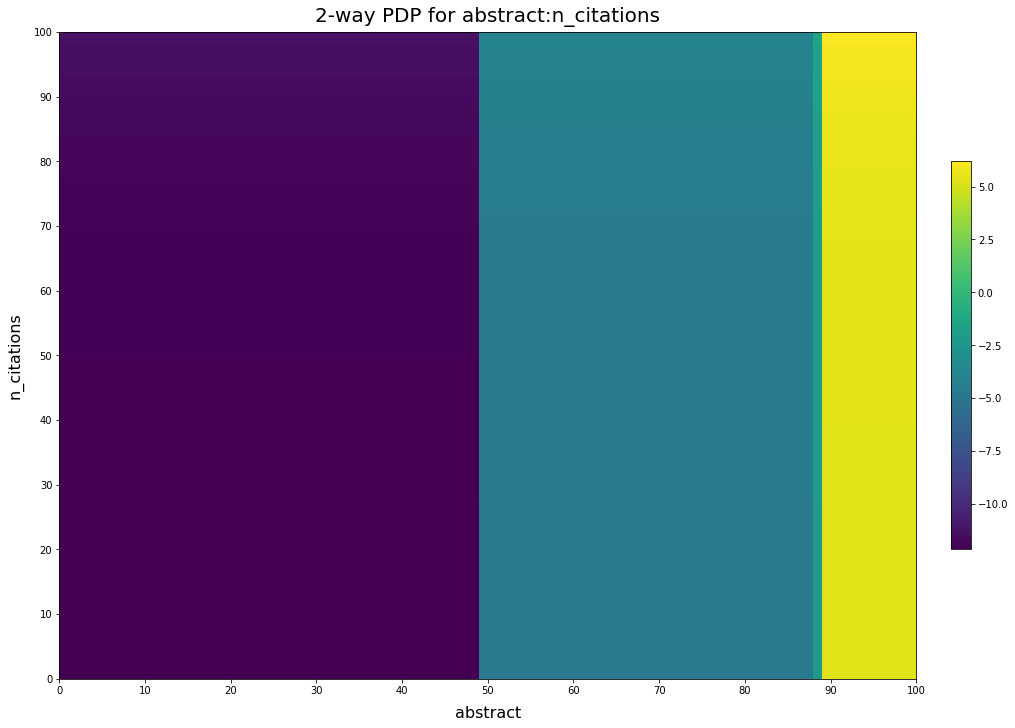

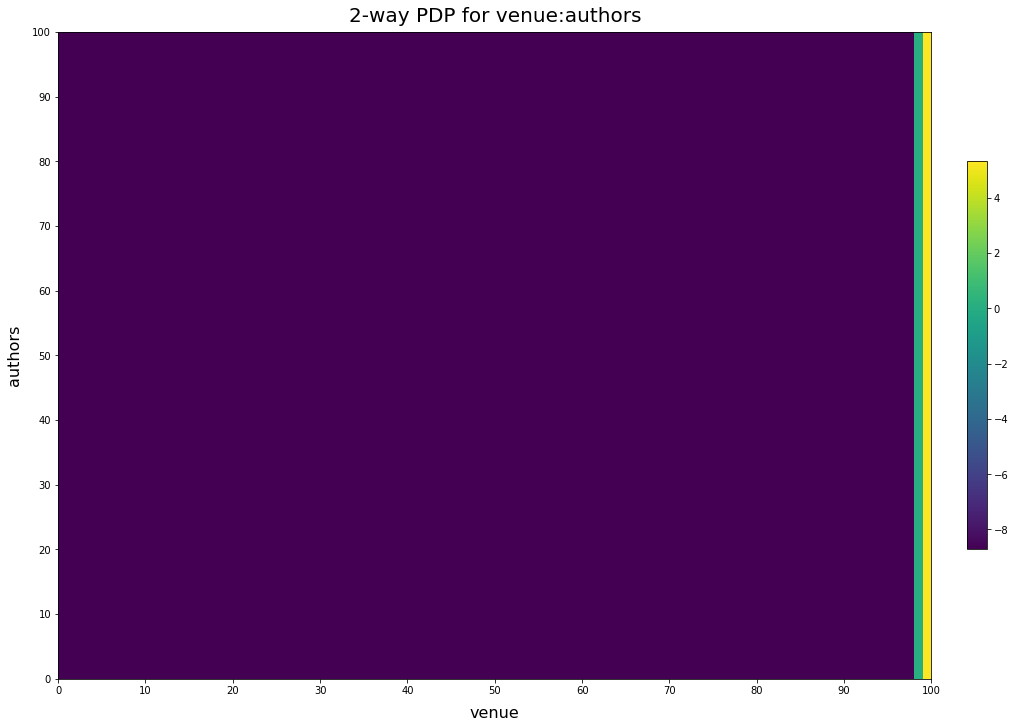

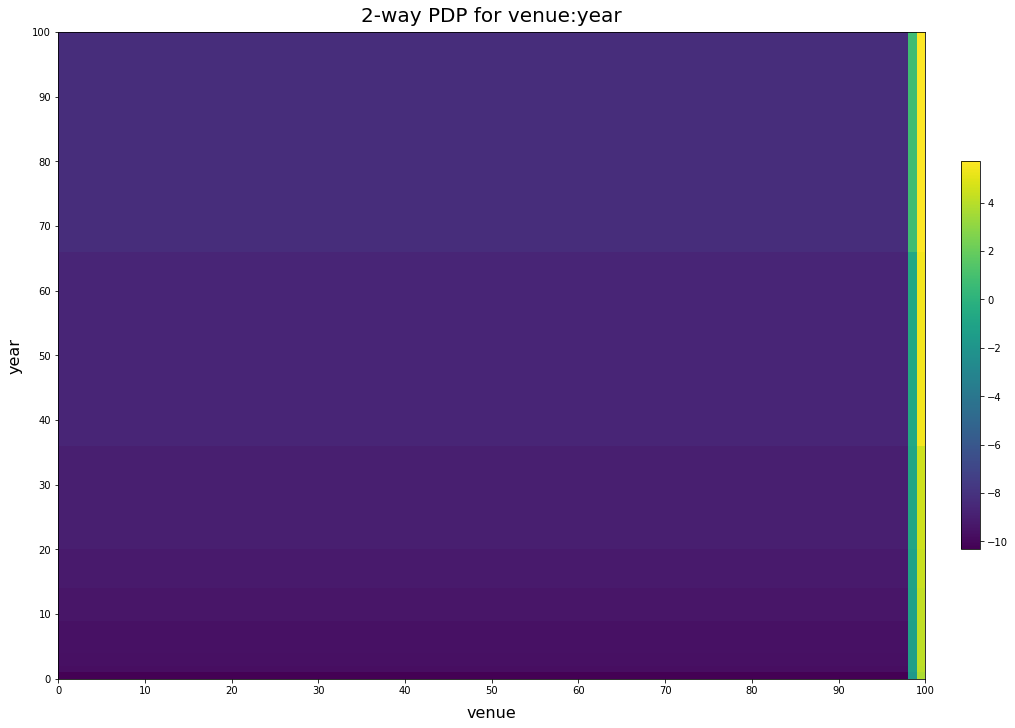

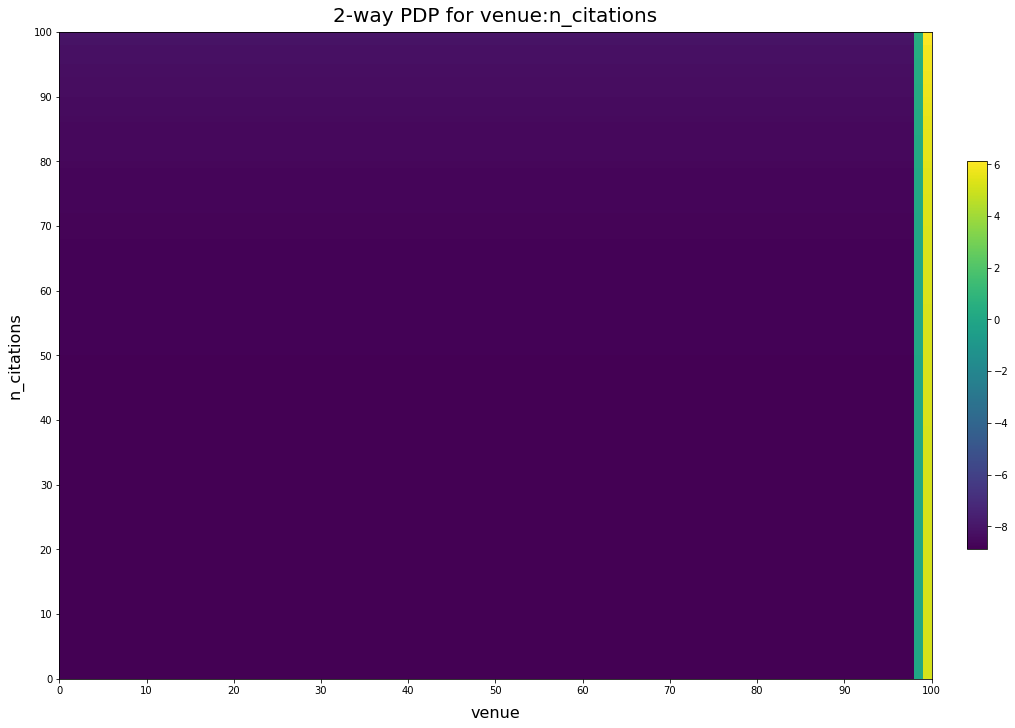

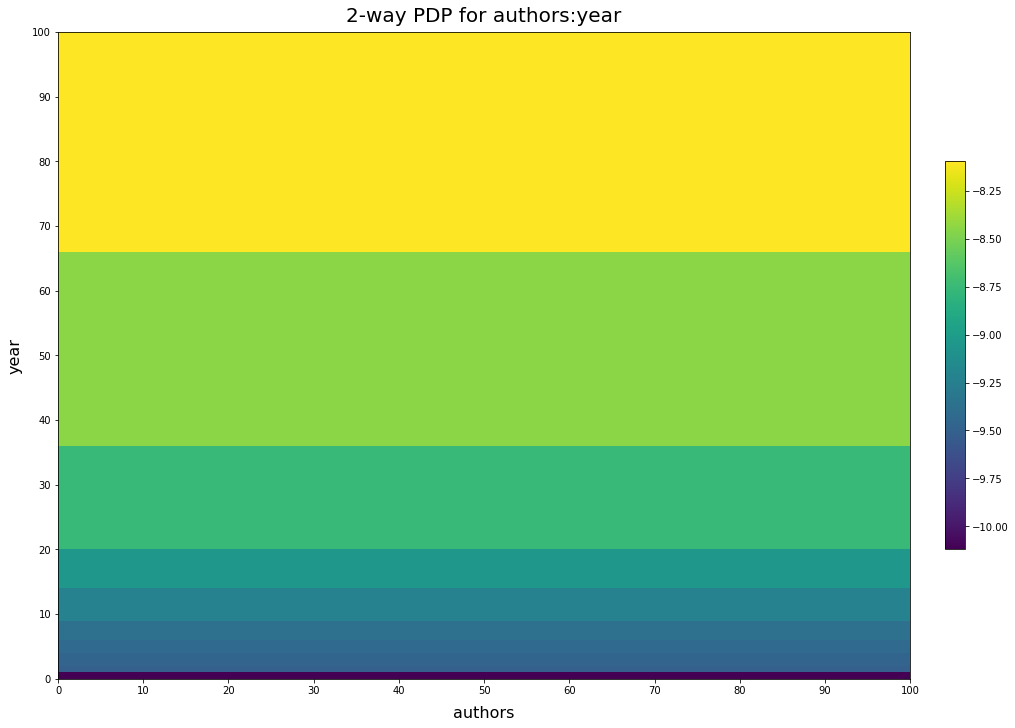

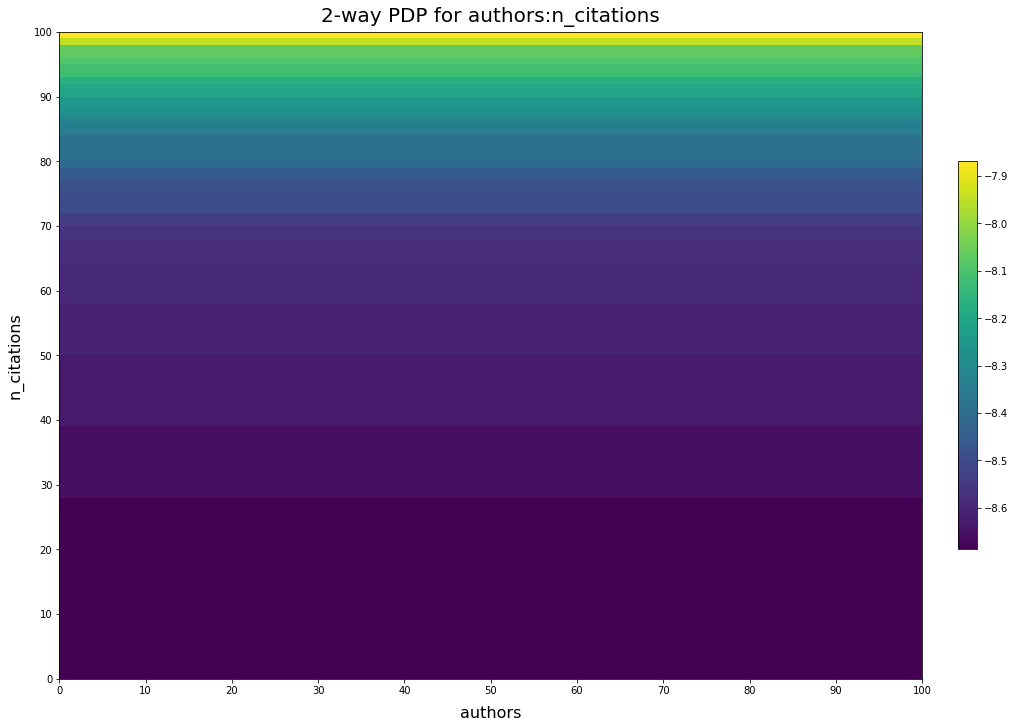

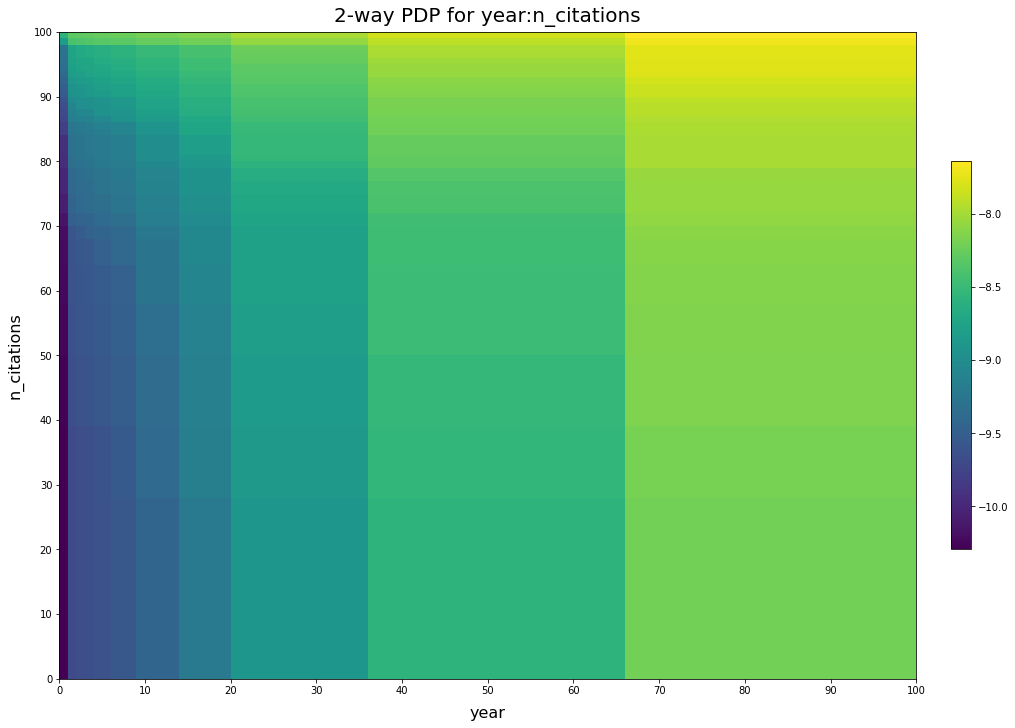

In [47]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

for pdp in pdp_xy:
    fig, ax = plt.subplots(figsize=(14, 10), constrained_layout=True)
    cmap = plt.colormaps['BuGn']
    
    im = ax.pcolormesh(pdp['z'], cmap=None, edgecolors='k', linewidths=0)

    ax.set_xlabel(pdp['f1_name'], fontsize=16, labelpad=10)
    ax.set_ylabel(pdp['f2_name'], fontsize=16, labelpad=10)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_title(pdp['title'], fontsize=20, pad=10)
    fig.colorbar(im, ax=ax, shrink=0.6, pad=0.03)
    # plt.savefig(os.path.join('.', 'plot', f"{sample_name}-2wpdp-{pdp['f1_name']}-{pdp['f2_name']}.png"), facecolor='white', transparent=False, bbox_inches='tight')
